In [306]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [307]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


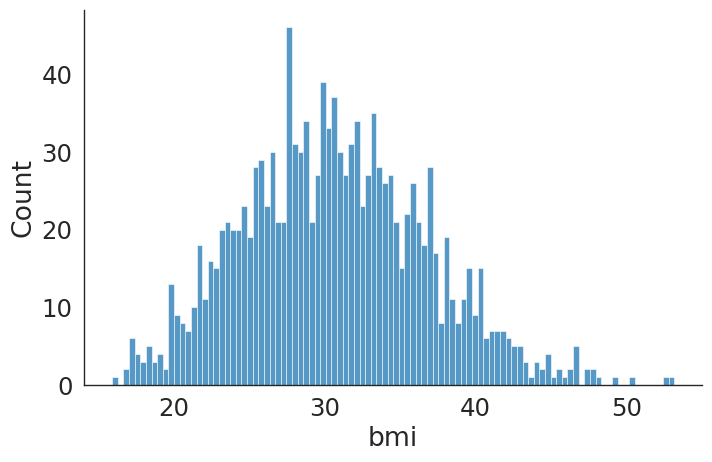

In [308]:
# Examine the distribution of Bmi (Body Mass Index
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="bmi", kind="hist", bins = 100, aspect = 1.5)

                     age       bmi  children   charges  smoker_encoded  \
age             1.000000  0.109272  0.042469  0.299008       -0.025019   
bmi             0.109272  1.000000  0.012759  0.198341        0.003750   
children        0.042469  0.012759  1.000000  0.067998        0.007673   
charges         0.299008  0.198341  0.067998  1.000000        0.787251   
smoker_encoded -0.025019  0.003750  0.007673  0.787251        1.000000   
region_encoded  0.002127  0.157566  0.016569 -0.006208       -0.002181   
sex_encoded    -0.020856  0.046371  0.017163  0.057292        0.076185   

                region_encoded  sex_encoded  
age                   0.002127    -0.020856  
bmi                   0.157566     0.046371  
children              0.016569     0.017163  
charges              -0.006208     0.057292  
smoker_encoded       -0.002181     0.076185  
region_encoded        1.000000     0.004588  
sex_encoded           0.004588     1.000000  


<Axes: >

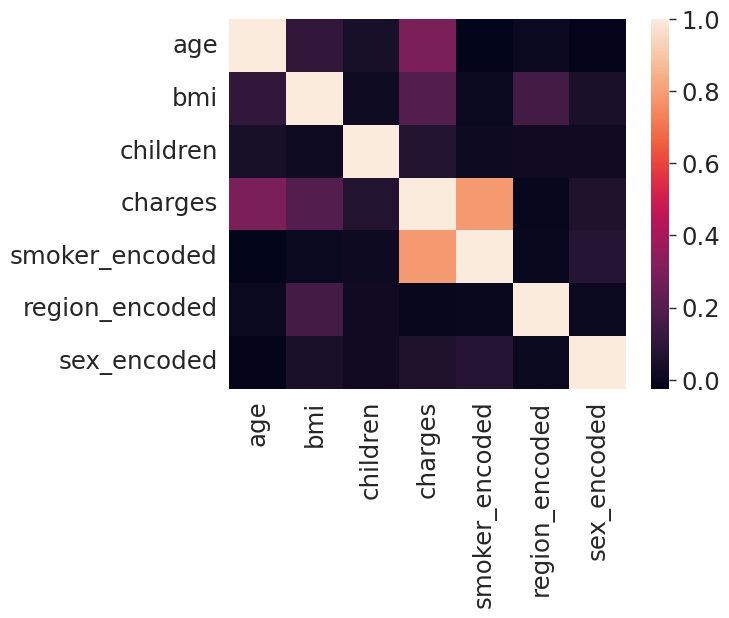

In [309]:
# Examine the relationship between “smoker” and “charges”
# Examine the relationship between “smoker” and “region”.
# Examine the relationship between “bmi” and “sex”.
# Examine the relationship between “age” and “bmi”.
# Examine the relationship between “bmi” and “children”

encoder = LabelEncoder()
df['smoker_encoded'] = encoder.fit_transform(df['smoker'])
df['region_encoded'] = encoder.fit_transform(df['region'])
df['sex_encoded'] = encoder.fit_transform(df['sex'])

corr = df.select_dtypes('number').corr()
print(corr)
sns.heatmap(corr)

In [310]:
print(df.groupby(['region'])['children'].sum())
print(df.groupby(['region'])['children'].sum().idxmax() + " has the most number of children")



region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64
southeast has the most number of children


In [311]:
compare = df[['region','smoker', 'bmi']]
compare.set_index('region')
compareGrouped = compare.groupby(['region','smoker'],as_index=False).mean()
compareGrouped

,region,smoker,bmi
0,northeast,no,29.332082
1,northeast,yes,28.565224
2,northwest,no,29.212678
3,northwest,yes,29.140431
4,southeast,no,33.442418
5,southeast,yes,33.096703
6,southwest,no,30.507865
7,southwest,yes,31.005172


      region smoker_x      bmi_x smoker_y      bmi_y
0  northeast      yes  28.565224       no  29.332082
1  northwest      yes  29.140431       no  29.212678
2  southeast      yes  33.096703       no  33.442418
3  southwest      yes  31.005172       no  30.507865


<Axes: >

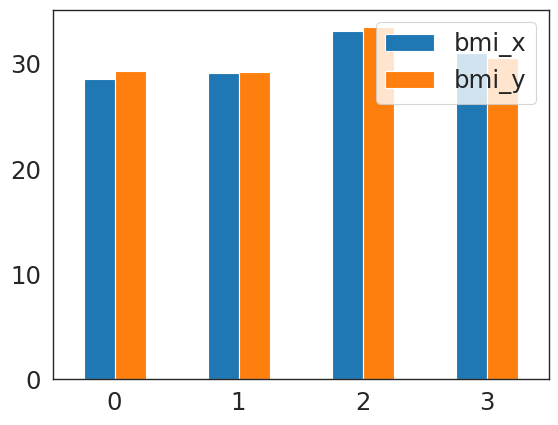

In [312]:
smokers = compareGrouped[compareGrouped.smoker == "yes"]
non_smokers = compareGrouped[compareGrouped.smoker == "no"]

res = pd.merge(smokers,non_smokers, left_on='region', right_on='region', how='left')
print(res)
res.plot.bar(rot=0)

In [313]:
df.drop(columns=["region", "sex", "smoker"], inplace=True)


In [314]:
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d, columns=df.columns)

In [315]:
scaled_df

,age,bmi,children,charges,smoker_encoded,region_encoded,sex_encoded
0,0.021739,0.321227,0.0,0.251611,1.0,1.000000,0.0
1,0.000000,0.479150,0.2,0.009636,0.0,0.666667,1.0
2,0.217391,0.458434,0.6,0.053115,0.0,0.666667,1.0
3,0.326087,0.181464,0.0,0.333010,0.0,0.333333,1.0
4,0.304348,0.347592,0.0,0.043816,0.0,0.333333,1.0
...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,0.151299,0.0,0.333333,1.0
1334,0.000000,0.429379,0.0,0.017305,0.0,0.000000,0.0
1335,0.000000,0.562012,0.0,0.008108,0.0,0.666667,0.0
1336,0.065217,0.264730,0.0,0.014144,0.0,1.000000,0.0


In [316]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = scaled_df.loc[:, scaled_df.columns != "charges"]
y = scaled_df.loc[:,"charges"]

for i in X.columns:
  X[i] = encoder.fit_transform(X[i])

y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<ipython-input-316-155a9b835172>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = encoder.fit_transform(X[i])
<ipython-input-316-155a9b835172>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = encoder.fit_transform(X[i])
<ipython-input-316-155a9b835172>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [317]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
#Models
logistic_classifier_model = LogisticRegression()

random_forest_model = RandomForestRegressor()

neural_network_model = MLPRegressor()

In [318]:
#Train

logistic_classifier_model.fit(X_train,y_train)

random_forest_model.fit(X_train, y_train)

neural_network_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [319]:
# Predict
logistic_pred = logistic_classifier_model.predict(X_test)

random_forest_pred=random_forest_model.predict(X_test)

nn_pred = neural_network_model.predict(X_test)


In [320]:
from sklearn.metrics import mean_squared_error

print(f"log reg mse: {mean_squared_error(y_test, logistic_pred)}")
print(f"random forest mse: {mean_squared_error(y_test, random_forest_pred)}")
print(f"nn mse: {mean_squared_error(y_test, nn_pred)}")

log reg mse: 175281.14676616914
random forest mse: 30017.896984473467
nn mse: 88313.8968413792
